In [1]:
# We have to use Decision Tree to prepare the model on the given data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df1=df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

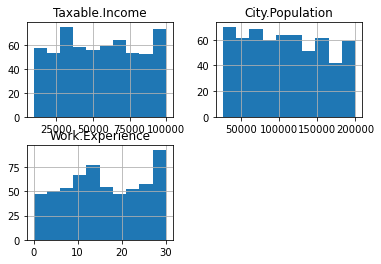

In [7]:
df1.hist()

In [8]:
df1.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [9]:
df1.shape

(600, 6)

C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


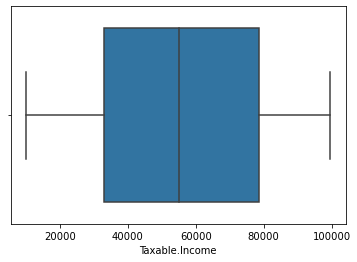

In [10]:
ax=sns.boxplot(df1['Taxable.Income'])

In [11]:
# There are no outliers.

In [12]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [13]:
df1=pd.get_dummies(df1,columns=['Undergrad','Marital.Status','Urban'])

In [14]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [15]:
#Our target variable is Taxable.Income,we will first convert it into categorical variable using the condition
#those who have taxable_income <= 30000 as "Risky" and others are "Good".


In [16]:
df1.loc[df1['Taxable.Income'] > 30000,'taxable.Income']= 'Good'
df1.loc[df1['Taxable.Income'] <= 30000,'taxable.Income']= 'Risky'

In [19]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable.Income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [17]:
df1.shape

(600, 11)

In [19]:
df1['taxable.Income'].values

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Taxable.Income           600 non-null    int64 
 1   City.Population          600 non-null    int64 
 2   Work.Experience          600 non-null    int64 
 3   Undergrad_NO             600 non-null    uint8 
 4   Undergrad_YES            600 non-null    uint8 
 5   Marital.Status_Divorced  600 non-null    uint8 
 6   Marital.Status_Married   600 non-null    uint8 
 7   Marital.Status_Single    600 non-null    uint8 
 8   Urban_NO                 600 non-null    uint8 
 9   Urban_YES                600 non-null    uint8 
 10  taxable.Income           600 non-null    object
dtypes: int64(3), object(1), uint8(7)
memory usage: 23.0+ KB


In [22]:
df1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'taxable.Income'],
      dtype='object')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Taxable.Income           600 non-null    int64 
 1   City.Population          600 non-null    int64 
 2   Work.Experience          600 non-null    int64 
 3   Undergrad_NO             600 non-null    uint8 
 4   Undergrad_YES            600 non-null    uint8 
 5   Marital.Status_Divorced  600 non-null    uint8 
 6   Marital.Status_Married   600 non-null    uint8 
 7   Marital.Status_Single    600 non-null    uint8 
 8   Urban_NO                 600 non-null    uint8 
 9   Urban_YES                600 non-null    uint8 
 10  taxable.Income           600 non-null    object
dtypes: int64(3), object(1), uint8(7)
memory usage: 23.0+ KB


In [24]:
x=df1.iloc[:,1:9]
y=df1.iloc[:,10]

In [25]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO
0,50047,10,1,0,0,0,1,0
1,134075,18,0,1,1,0,0,0
2,160205,30,1,0,0,1,0,0
3,193264,15,0,1,0,0,1,0
4,27533,28,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0
596,55369,2,0,1,1,0,0,0
597,154058,0,1,0,1,0,0,0
598,180083,17,0,1,0,1,0,1


In [26]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable.Income, Length: 600, dtype: object

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [28]:
x_train.shape,x_test.shape

((420, 8), (180, 8))

In [29]:
y_train.value_counts()

Good     336
Risky     84
Name: taxable.Income, dtype: int64

In [30]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.59375, 0.9, 'X[0] <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(0.3125, 0.7, 'X[0] <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]'),
 Text(0.1875, 0.5, 'X[1] <= 18.5\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 Text(0.125, 0.3, 'X[0] <= 36940.0\nentropy = 0.904\nsamples = 25\nvalue = [17, 8]'),
 Text(0.0625, 0.1, 'entropy = 0.742\nsamples = 19\nvalue = [15, 4]'),
 Text(0.1875, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.25, 0.3, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.4375, 0.5, 'X[4] <= 0.5\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.5, 0.3, 'X[1] <= 17.0\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.4375, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5625, 0.1, 'entropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.875, 0.7, 'X[0] <= 195947.0\nentropy = 0.768\nsamples = 334\nvalue = [259, 7

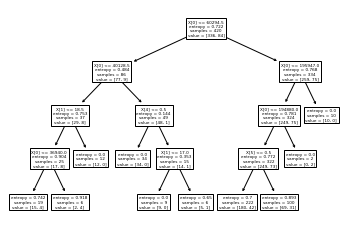

In [31]:
tree.plot_tree(model)

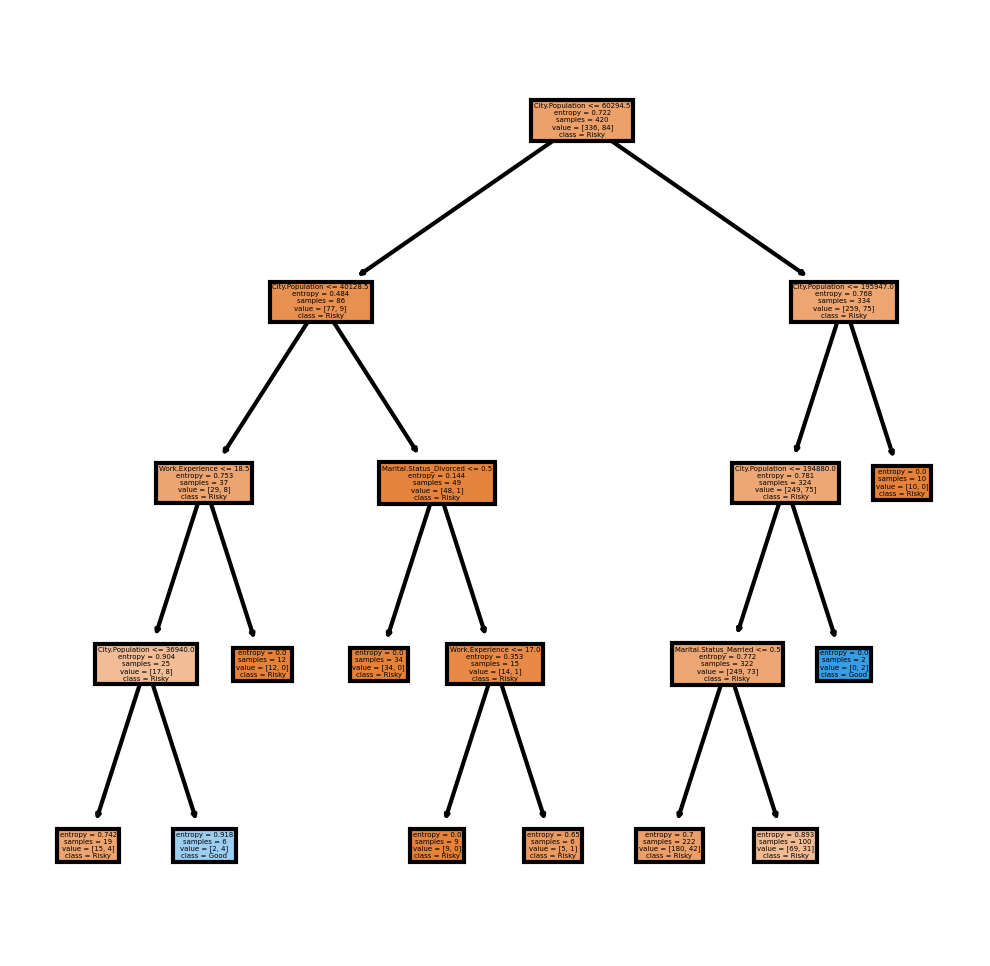

In [32]:
fn=['City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [33]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     177
Risky      3
dtype: int64

In [34]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
taxable.Income,,
Good,137,3
Risky,40,0


In [35]:
# Test Accuracy 
np.mean(preds==y_test)

0.7611111111111111

In [36]:
# We got the accuracy of 76.11%.
# Now let's try to increase the accuracy.

In [38]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=20)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20)

[Text(0.39705882352941174, 0.9, 'X[0] <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(0.11764705882352941, 0.7, 'X[0] <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]'),
 Text(0.058823529411764705, 0.5, 'entropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 Text(0.17647058823529413, 0.5, 'X[0] <= 53980.5\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]'),
 Text(0.11764705882352941, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.23529411764705882, 0.3, 'entropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(0.6764705882352942, 0.7, 'X[5] <= 0.5\nentropy = 0.768\nsamples = 334\nvalue = [259, 75]'),
 Text(0.47058823529411764, 0.5, 'X[0] <= 130364.0\nentropy = 0.704\nsamples = 230\nvalue = [186, 44]'),
 Text(0.35294117647058826, 0.3, 'X[0] <= 110001.0\nentropy = 0.773\nsamples = 132\nvalue = [102, 30]'),
 Text(0.29411764705882354, 0.1, 'entropy = 0.682\nsamples = 94\nvalue = [77, 17]'),
 Text(0.4117647058823529, 0.1, 'entropy = 0.927\nsamples = 

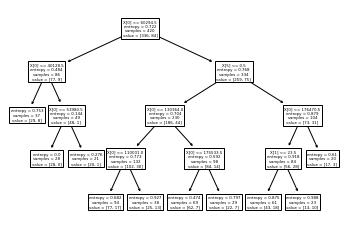

In [39]:
tree.plot_tree(model1)

In [42]:
preds1=model1.predict(x_test)
pd.Series(preds1).value_counts()

Good    180
dtype: int64

In [44]:
pd.crosstab(y_test,preds1)

col_0,Good
taxable.Income,
Good,140
Risky,40


In [45]:
np.mean(preds1==y_test)

0.7777777777777778

In [46]:
# We have now increased the accuracy to 77.77%.

In [47]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=20)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20)

[Text(0.4230769230769231, 0.875, 'X[0] <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(0.15384615384615385, 0.625, 'X[0] <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 Text(0.23076923076923078, 0.375, 'X[0] <= 53980.5\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(0.6923076923076923, 0.625, 'X[5] <= 0.5\nentropy = 0.768\nsamples = 334\nvalue = [259, 75]'),
 Text(0.5384615384615384, 0.375, 'X[0] <= 130364.0\nentropy = 0.704\nsamples = 230\nvalue = [186, 44]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.773\nsamples = 132\nvalue = [102, 30]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.592\nsamples = 98\nvalue = [84, 14]'),
 Text(0.8461538461538461, 0.375, 'X[0] <= 176470.5\nentropy = 

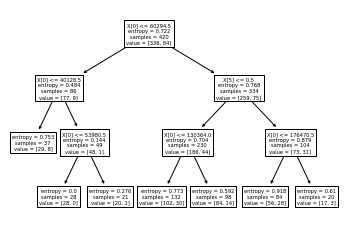

In [48]:
tree.plot_tree(model2)

In [50]:
preds2=model2.predict(x_test)
pd.Series(preds2).value_counts()

Good    180
dtype: int64

In [51]:
pd.crosstab(y_test,preds2)

col_0,Good
taxable.Income,
Good,140
Risky,40


In [52]:
np.mean(preds2==y_test)

0.7777777777777778

In [53]:
# We observe that the accuracy is 77.7%. 

In [54]:
# Although model1 and model2 show better accuracy than model having accuracy 76.11%,model1 and model2 are predicting the 40'Risky' 
# observations as 'Good',so even though the accuracy is increased,we get incorrect predictions.
# Hence we will go with the model having 76.11% accuracy.